### Question
Implement a simulation that can assist to study the birthday paradox. You may follow the link to learn more about it, but for this assignment here's what you need to do:

Assume that birthdays of individuals are uniformly distributed over the 365 days in a year. Further, assume that the year is not a leap year, and that it begins on a Monday. We define a calendar week to be the seven days from Monday to Sunday.

Suppose there are  𝑛  people in a room. How large does have  𝑛  have to be in order for the probability that there are at least 3 people with their birthdays within the same calendar week to be more than 0.5? You should include a visualisation in your answer.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng
import pandas as pd
import scipy.stats as stats

#### assigning no. of weeks

In [3]:
weeks = np.arange(1,54)
weeks

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

#### This line generates random number between 0-53(as specified by the weeks variable) f desired size 
change the value of the size from 30 to other number and the cell. you will understand what the code is doing

In [14]:
rng = default_rng()
a = rng.choice(weeks, size=30, replace=True) #considering 30 ppl
a

array([43, 21, 26, 18, 19,  6, 37, 31, 40, 27, 15,  6,  3, 19,  5, 25, 38,
       53, 12, 44, 24, 42, 53, 36, 26, 35, 13, 47, 31, 16])

#### Creating a data frame of the generated values. A data frame is basically a table 
make sure you use pandas moddule to acess the DataFrame() function

In [9]:
df = pd.DataFrame(a, columns = ['B.day Week'])

#### using the value counts() function I'm counting the no occurences of each B'day week
by default they will always be in descending order
th this example 43 appears 3 times

In [15]:
df['B.day Week'].value_counts()

24    2
53    2
52    2
16    2
13    2
31    1
11    1
34    1
4     1
5     1
2     1
7     1
8     1
42    1
47    1
12    1
30    1
49    1
39    1
19    1
20    1
27    1
28    1
29    1
33    1
Name: B.day Week, dtype: int64

##### we just need to know if there is atlest one bday week which appears thrice or more
se we just need to check the first element is greater than or equal to 3 or not as it will always be sorted in descending order

In [16]:
df['B.day Week'].value_counts().values

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

#### 1. Now we ran the operation just once for n = 30
2. In order to develope more confidence we should run 500 simulations as because the list obtained was derived from random choice and each time the bday
wekk combunation will change
3. Nect step will be to calculate the probabilities of getting atlest 3 people having same bday week in the 500 simulations
4. Also we need to check for all values and not just n = 30

In [17]:
N=35
simulations = 500
probabilities = []
for n in range(3,N):
    count = 0
    for i in range(simulations):
        s = rng.choice(weeks, size=n, replace=True)
        df = pd.DataFrame(a, columns = ['B.day Week'])
        
        if df['B.day Week'].value_counts().values[0] >= 3: #3 or more people having common bday week
            count = count+1
    Probability = count/simulations
    probabilities.append(Probability)
    print('n = ',n,', Probability ------->', Probability)

n =  3 , Probability -------> 0.0
n =  4 , Probability -------> 0.0
n =  5 , Probability -------> 0.0
n =  6 , Probability -------> 0.0
n =  7 , Probability -------> 0.0
n =  8 , Probability -------> 0.0
n =  9 , Probability -------> 0.0
n =  10 , Probability -------> 0.0
n =  11 , Probability -------> 0.0
n =  12 , Probability -------> 0.0
n =  13 , Probability -------> 0.0
n =  14 , Probability -------> 0.0
n =  15 , Probability -------> 0.0
n =  16 , Probability -------> 0.0
n =  17 , Probability -------> 0.0
n =  18 , Probability -------> 0.0
n =  19 , Probability -------> 0.0
n =  20 , Probability -------> 0.0
n =  21 , Probability -------> 0.0
n =  22 , Probability -------> 0.0
n =  23 , Probability -------> 0.0
n =  24 , Probability -------> 0.0
n =  25 , Probability -------> 0.0
n =  26 , Probability -------> 0.0
n =  27 , Probability -------> 0.0
n =  28 , Probability -------> 0.0
n =  29 , Probability -------> 0.0
n =  30 , Probability -------> 0.0
n =  31 , Probability -----

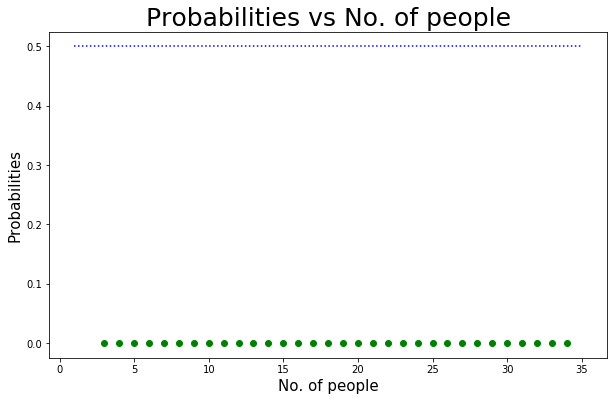

In [22]:
plt.figure(figsize=(10,6)) #used for changing the plot size
plt.plot(range(3,35), probabilities, 'go')
plt.hlines(0.5, 1,35, colors='b', linestyles='dotted')
plt.title('Probabilities vs No. of people',size=25)
plt.ylabel('Probabilities', size=15)
plt.xlabel('No. of people', size=15)
plt.show()